<a href="https://www.kaggle.com/code/swish9/fake-bill-xgboost-99-accuracy?scriptVersionId=120318226" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing Python Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

In [2]:
dataset = pd.read_csv('/kaggle/input/fake-bills/fake_bills.csv',sep=';')

In [3]:
dataset

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [4]:
dataset.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

# Taking care of missing data

In [5]:
dataset.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [6]:
dataset.margin_low.describe()

count    1463.000000
mean        4.485967
std         0.663813
min         2.980000
25%         4.015000
50%         4.310000
75%         4.870000
max         6.900000
Name: margin_low, dtype: float64

In [7]:
print(dataset.margin_low.mode())
print(dataset.margin_low.median())
print(dataset.margin_low.mean())

0    4.08
1    4.10
2    4.18
dtype: float64
4.31
4.485967190704033


In [8]:
dataset.margin_low.fillna(dataset.margin_low.mean(),axis = 0, inplace = True)

In [9]:
dataset.margin_low.isnull().sum()

0

# Encoding the Dependent Variable

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.is_genuine = le.fit_transform(dataset.is_genuine)

In [11]:
X = dataset.drop(columns = 'is_genuine')
y = dataset['is_genuine'].values

In [12]:
X

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...
1495,171.75,104.38,104.17,4.42,3.09,111.28
1496,172.19,104.63,104.44,5.27,3.37,110.97
1497,171.80,104.01,104.12,5.51,3.36,111.95
1498,172.06,104.28,104.06,5.17,3.46,112.25


In [13]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [14]:
X.dtypes

diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [15]:
X.isnull().sum()

diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

# Data Visualisation

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


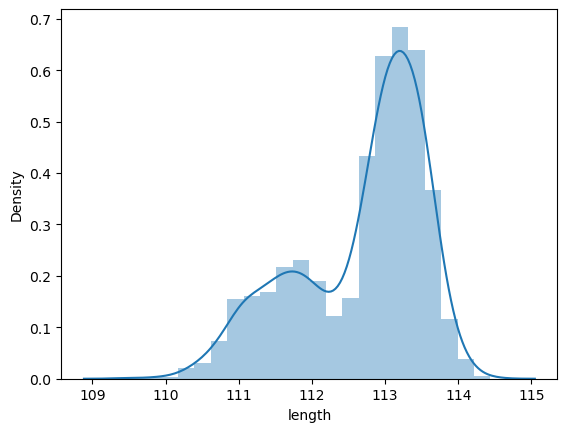

In [16]:
sns.distplot(dataset['length'])
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


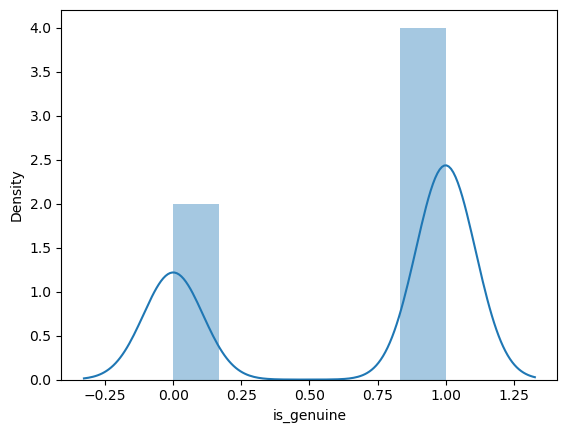

In [17]:
sns.distplot(dataset['is_genuine'])
plt.show()

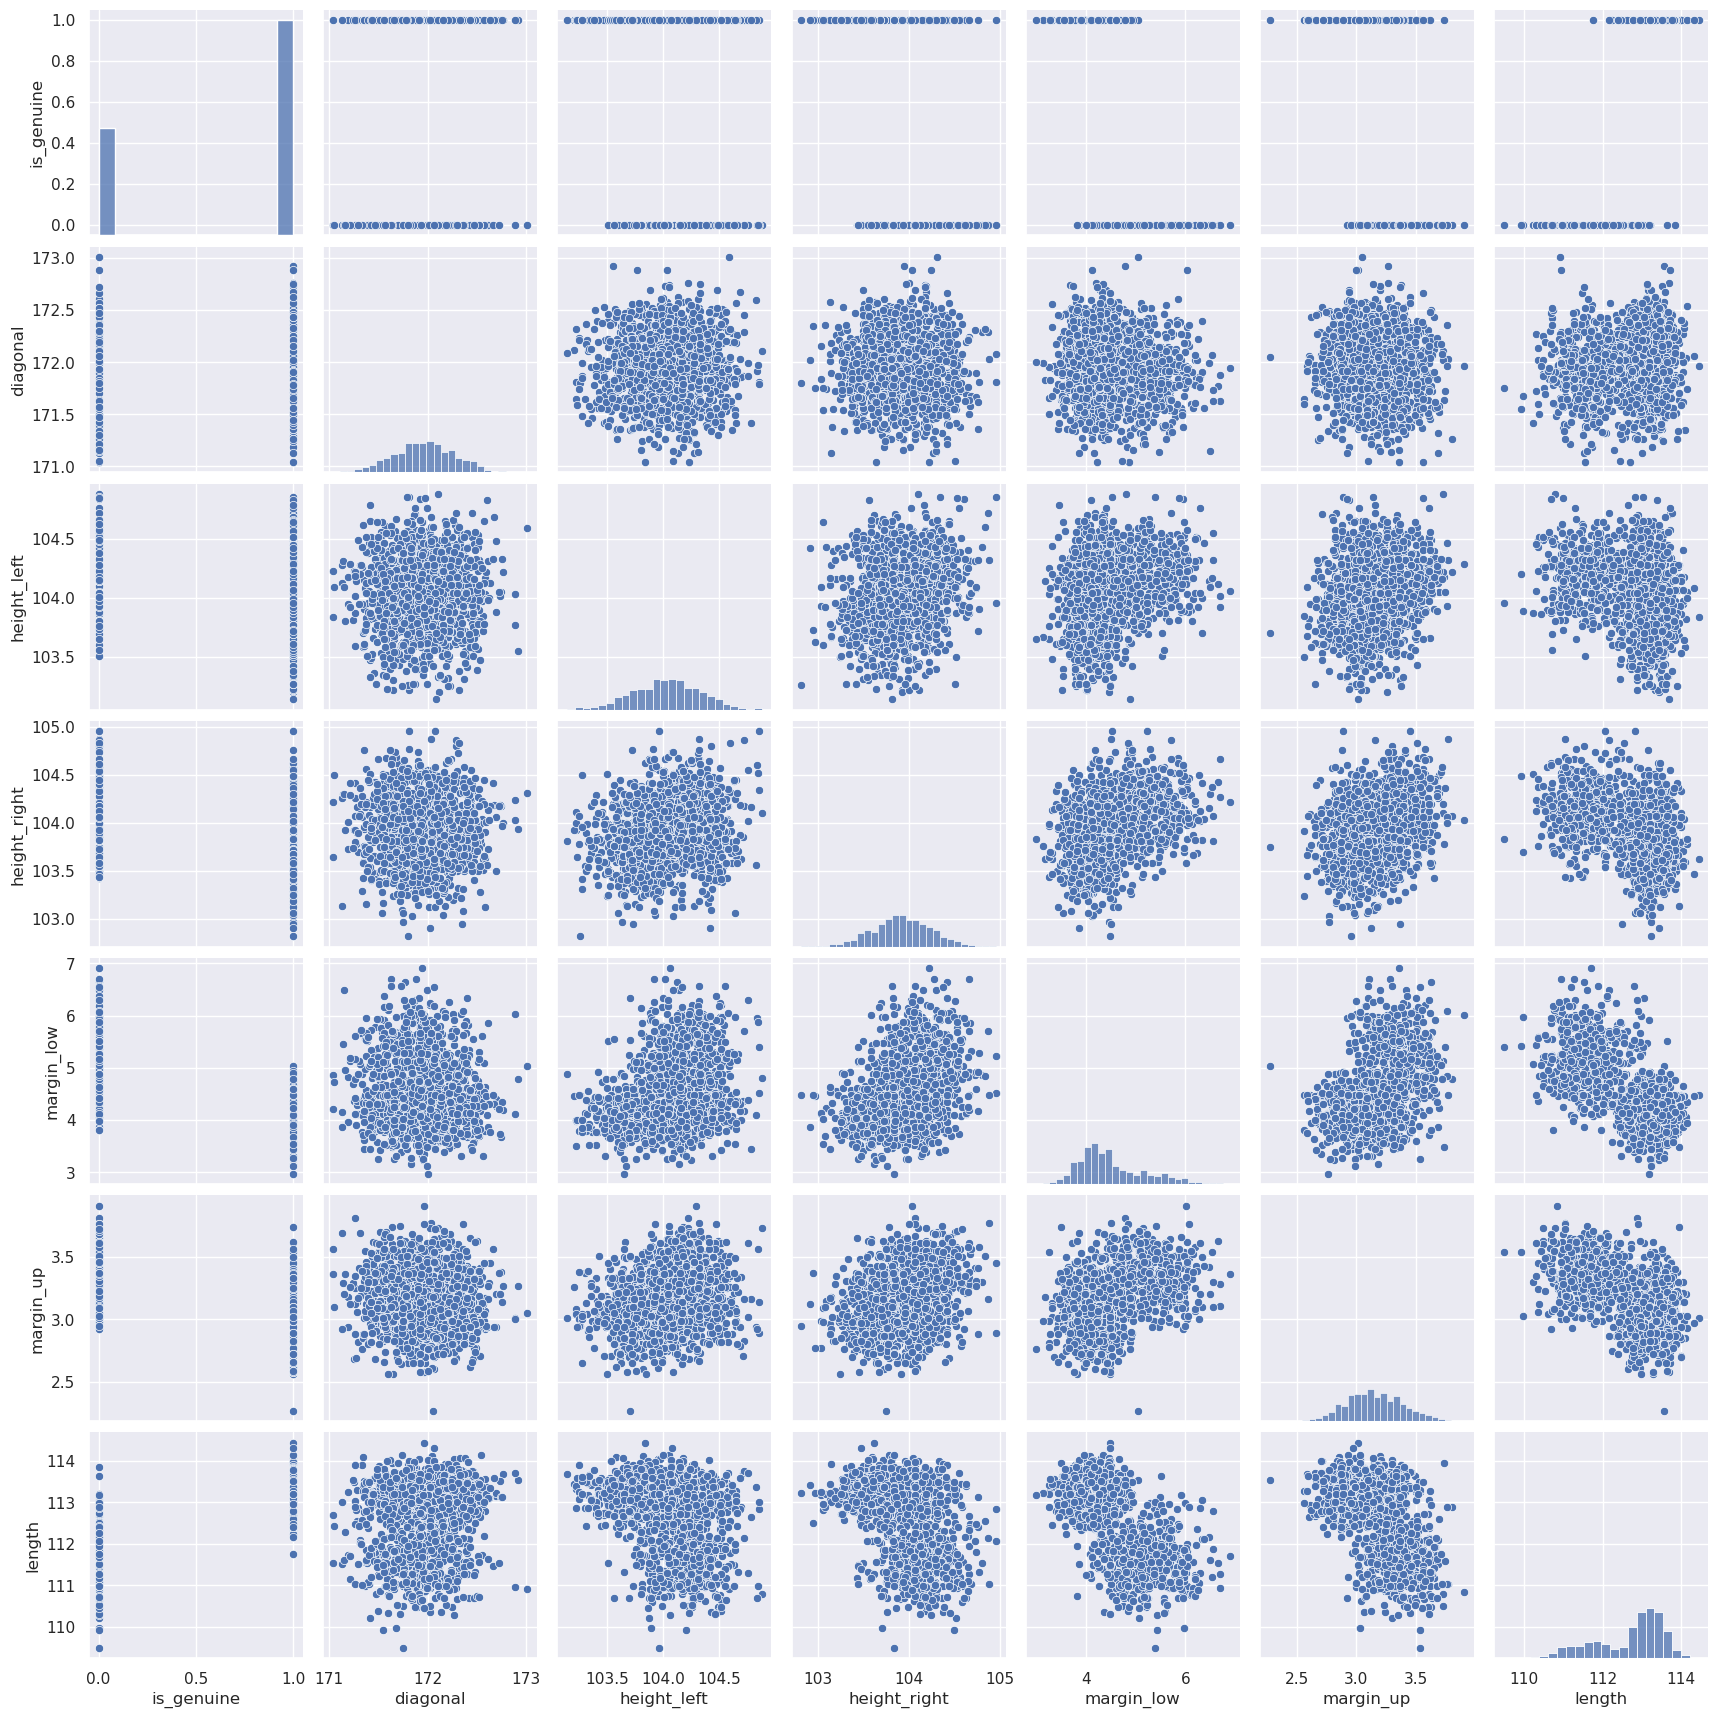

In [18]:
sns.set()
sns.pairplot(dataset)
plt.show()

In [19]:
# plt.figure(figsize=(20,5))
# sns.barplot(x='height_left',y='is_genuine', hue='height_right',data=dataset , estimator=np.mean)
# plt.show()

# Spliting Datasets into training and testing subsets 

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
X_train

,diagonal,height_left,height_right,margin_low,margin_up,length
620,171.87,103.40,103.82,4.06,2.94,113.02
655,172.09,104.06,103.90,3.97,3.32,113.09
319,172.05,104.11,104.14,4.73,2.73,113.30
140,172.47,103.82,103.59,3.85,2.77,113.17
629,172.01,104.03,103.67,3.90,3.18,112.61
...,...,...,...,...,...,...
763,172.41,104.43,103.65,3.97,3.35,113.71
835,172.15,104.08,104.10,4.34,2.78,113.33
1216,171.93,104.09,104.51,4.87,3.58,111.63
559,172.12,103.59,103.77,3.74,3.21,113.32


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
X_train

array([[-0.267834  , -2.14957676, -0.30731463, -0.65200023, -0.91554663,
         0.39799821],
       [ 0.45537533,  0.10250975, -0.0606613 , -0.78830508,  0.73846575,
         0.47832076],
       [ 0.32388272,  0.27312236,  0.67929868,  0.3627136 , -1.82960611,
         0.7192884 ],
       ...,
       [-0.07059509,  0.20487731,  1.82007032,  0.57474336,  1.87015843,
        -1.19697805],
       [ 0.55399478, -1.50124883, -0.46147296, -1.13663968,  0.25967269,
         0.7422377 ],
       [ 0.58686793, -0.92116594, -0.21481963, -1.27294452,  0.39025261,
         0.28325172]])

# Training XGBoost on the Training set

In [24]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 96   1]
 [  2 201]]


0.99

In [26]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.58 %
Standard Deviation: 1.06 %


**This was my first Time using XGBoost.
And voila it didn't failed to impress me.
Accuracy Score - 0.99**